<div class="alert alert-block alert-danger">

# FIT5196 Assessment 2
    
#### Student Name: Anon Pipatpakin
#### Student ID: 33366829

Date: 10/05/2023

Environment: 3.9.13
    </div>

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Task1: Imputing missing data.](#examine) <br>
[4. Task2: Data error cleaning](#load) <br>
[5. Task3: Outlier detecting and removing](#write) <br>
[6. References](#Ref) <br>

<div class="alert alert-block alert-success">
    
## 1.  Introduction  <a class="anchor" name="Intro"></a>

This assignement contains of total 3 tasks and each task will be performed using different files.
1. Imputing missing values using 33366829_missing_data.csv 
2. Cleaning error from data set using 33366829_dirty_data.csv
3. Detecting and removing outliers using 33366829_outlier_data.csv

-------------------------------------

<div class="alert alert-block alert-success">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>

In this assessment, any python packages is permitted to be used. The following packages were used to accomplish the related tasks:

* **pandas:** to work with data frame
* **re:** to define and use regular expressions
* **numpy:** to solve linear equation
* **seaborn:** to plot graph
* **matplotlib.pyplot:** to plot graph
* **ast:** to change sting of list to be list
* **folium:** to plot lat and long in map
* **math:** to calculate distance, latitude and lingtutude
* **SentimentIntensityAnalyzer:** to do sentiment analysis on a customer review
* **LinearRegression:** to train linear regression model
* **train_test_split:** to split data set to train and training set
* **mean_squared_error:** to find mean squre error
* **LocalOutlierFactor:** to detect outliers using LOF method
* **accuracy_score:** to find prediction accuracy
* **KNeighborsClassifier:** to train kNN model
* **LogisticRegression:** to train logistic regression model
....

In [224]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import folium
from math import sin, cos, sqrt, atan2, radians, asin, degrees, ceil
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from builtins import str
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

-------------------------------------

<div class="alert alert-block alert-success">
    
## 3.  Task1: Imputing missing data <a class="anchor" name="examine"></a>

In this section, we will impute a missing value the file 33366829.csv. First we need to load data to python.

## Loading data

In [225]:
miss_df = pd.read_csv('33366829_missing_data.csv')

Check which columns contain null value by using function .isnull().sum() as below.

In [226]:
miss_df.isnull().sum()

order_id                           0
customer_id                        0
date                               0
nearest_warehouse                100
shopping_cart                      0
order_price                        0
delivery_charges                  50
customer_lat                       0
customer_long                      0
delivery_discount                  0
season                             0
is_expedited_delivery              0
distance_to_nearest_warehouse     50
latest_customer_review             0
is_happy_customer                  0
dtype: int64

We can see that there are total 3 coloumns contain nulls.
1. nearest_warehouse contains 100 nulls.
2. delivery_charges contains 50 nulls.
3. distance_to_nearest_warehouse contains 50 nulls.

## Imputing nearest_warehouse

Since we know the latitude and longtitude of customers and distance to nearest ware. So we can impute the missing nearest warehouse by calculating from the known columns.

**Create function** that can be used to retrive nearest_warehouse and distance_to_nearest_warehouse.

In [227]:
def get_warehouse_dist(warehouse=None, cust_lat= None, cust_lon= None, miss_dist=False):
    '''
    Input
    warehouse: warehouse name
    cust_lat: customer latitude
    cust_lon: customer_longtitude
    miss_dist: use to indicate that we want to retrive distance
    Output:
    warehouse or distance
    '''
    
    # warehouse latitude and long titude
    warehouse_lo_dict = {'Nickolson': [-37.818595, 144.969551],
                         'Thompson': [-37.8126732, 144.9470689],
                         'Bakers':[-37.8099961, 144.995232]}
    
    # Find nearest warehouse
    if miss_dist == False:
        # dict for keeping calculated distance between customer location and warehouse 
        dist_dict = {'Nickolson': [],
                     'Thompson': [],
                     'Bakers':[]}
        # loop through warehouse_dict to get latitude and longtutude
        for key in warehouse_lo_dict:
            lat1 = warehouse_lo_dict[key][0] # warehouse lat
            lon1 = warehouse_lo_dict[key][1] # warehouse long
            lat2 = cust_lat 
            lon2 = cust_lon

            # convert decimal degrees to radians
            lat1 = radians(lat1)
            lon1 = radians(lon1)
            lat2 = radians(lat2)
            lon2 = radians(lon2)
            # haversine formula
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
            c = 2 * asin(sqrt(a))
            # Radius of earth in kilometers is 6378
            km = round(6378 * c, 5)

            dist_dict[key].append(km)

        # turn dict to list
        dist_value_list = list(dist_dict.values())
        # find min value from list
        dist_min = min(dist_value_list)

        # loop throgh dist_dict to get nearest warehouse name
        for key in dist_dict:
            if dist_dict[key] == dist_min:
                return key   
            
    # find distance to nearest warehouse
    elif miss_dist == True:
        lat1 = warehouse_lo_dict[warehouse][0]
        lon1 = warehouse_lo_dict[warehouse][1]
        lat2 = cust_lat
        lon2 = cust_lon
        
        # convert decimal degrees to radians
        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)
        
        # haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * asin(sqrt(a))
        # Radius of earth in kilometers is 6378
        km = round(6378 * c, 5)
        
        return km

**Impute null values in nearest_warehouse**

In [228]:
miss_df.loc[miss_df['nearest_warehouse'].isnull(), 'nearest_warehouse'] = miss_df.loc[miss_df['nearest_warehouse'].isnull(), ['customer_lat', 'customer_long']].apply(lambda x:get_warehouse_dist(cust_lat=x['customer_lat'], cust_lon=x['customer_long']), axis=1)

check to see if null still exist.

In [229]:
# check to see if null still exist
miss_df.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                 50
customer_lat                      0
customer_long                     0
delivery_discount                 0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    50
latest_customer_review            0
is_happy_customer                 0
dtype: int64

## Impute distance_to_nearest_warehouse

We will impute the distance_to_nearest_warehouse by using the above get_warehouse_dist function that recive nearst_warehouse, customer_lat, and customer_long columns to calculate the distance. 

**Impute missing values**

In [230]:
miss_df.loc[miss_df['distance_to_nearest_warehouse'].isnull(), 'distance_to_nearest_warehouse'] = miss_df.loc[miss_df['distance_to_nearest_warehouse'].isnull()].apply(lambda x: get_warehouse_dist(warehouse=x['nearest_warehouse'], cust_lat=x['customer_lat'], cust_lon=x['customer_long'], miss_dist=True), axis=1)

check to see if null still exist.

In [231]:
miss_df.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                 50
customer_lat                      0
customer_long                     0
delivery_discount                 0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                 0
dtype: int64

## Impute delivery_charges

To impute delivery_charges, first we need to train linear regression to predict delivery_charges. The specification mentioned that different season has different rule for calculating delivery_charges so we need to train model for each season. The steps will be as follow.
1. Create another data frame to prevent interfering with main data frame.
2. Split data to training and testing sets.
3. Train model for each season.
4. Predicting.
5. Evaluate models.
6. Impute delivery_charges.

#### Create new data frame

In [232]:
miss_df2 = miss_df.copy()

We also know from the instruction that delivery_charges depend on season, is_expedited_delivery, distance_to_nearest_warehouse, is_happy_customer, delivery_discount columns.

In [233]:
# keep only related features
miss_df2 = miss_df2[['delivery_discount', 'season' , 'is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer', 'delivery_charges']]

**Create data frame for each season**

In [234]:
# separate byseason
summer_df = miss_df2.loc[miss_df2['season'] == 'Summer'].drop('season', axis= 1)
spring_df = miss_df2.loc[miss_df2['season'] == 'Spring'].drop('season', axis= 1)
autumn_df = miss_df2.loc[miss_df2['season'] == 'Autumn'].drop('season', axis= 1)
winter_df = miss_df2.loc[miss_df2['season'] == 'Winter'].drop('season', axis= 1)

**Train summer model**

First, we need to drop all na from the data frame, next calculate full prices using delivery_discount and delivery_charges. Then drop unwanted columns.

In [235]:
summer_non_miss = summer_df.dropna()
summer_non_miss['full_delivery_price'] = round(summer_non_miss['delivery_charges'] / (1-(summer_non_miss['delivery_discount']/100)), 3)
summer_non_miss = summer_non_miss.drop(columns=['delivery_discount', 'delivery_charges'])

C:\Users\non_n\AppData\Local\Temp\ipykernel_10732\870224428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_non_miss['full_delivery_price'] = round(summer_non_miss['delivery_charges'] / (1-(summer_non_miss['delivery_discount']/100)), 3)


Split data into independent and dependent data sets.

In [236]:
# Independent variable
summer_X = summer_non_miss.drop('full_delivery_price', axis= 1)

# Dependent variable
summer_y = summer_non_miss['full_delivery_price']

Split training and testing data sets.

In [237]:
# split summer data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(summer_X, summer_y, random_state=1)

Training model

In [238]:
lm_summer = LinearRegression()
# create model
lm_summer.fit(X_train, y_train)

# predict using model
lm_summer_pre = lm_summer.predict(X_train)

Calculate R2 score

In [239]:
# calculate R2
r2 = lm_summer.score(X_test, y_test)
print(f'R2 for summer model: {r2}')

R2 for summer model: 0.9963197776513568


For the remaining season, the steps of spliting data, training, and evaluating will be same as above.

**Train spring model**

In [240]:
spring_non_miss = spring_df.dropna()
spring_non_miss['full_delivery_price'] = round(spring_non_miss['delivery_charges'] / (1-(spring_non_miss['delivery_discount']/100)), 3)
spring_non_miss = spring_non_miss.drop(columns=['delivery_discount', 'delivery_charges'])

C:\Users\non_n\AppData\Local\Temp\ipykernel_10732\1811685092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_non_miss['full_delivery_price'] = round(spring_non_miss['delivery_charges'] / (1-(spring_non_miss['delivery_discount']/100)), 3)


In [241]:
# Independent variable
spring_X = spring_non_miss.drop('full_delivery_price', axis= 1)

# Dependent variable
spring_y = spring_non_miss['full_delivery_price']

In [242]:
# split summer data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(spring_X, spring_y, random_state=1)

In [243]:
lm_spring = LinearRegression()
# create model
lm_spring.fit(X_train, y_train)

# predict using model
lm_spring_pre = lm_spring.predict(X_train)

In [244]:
# calculate R2
r2 = lm_spring.score(X_test, y_test)
print(f'R2 for spring model: {r2}')

R2 for spring model: 0.9946577356769899


**Train autumn model**

In [245]:
autumn_non_miss = autumn_df.dropna()
autumn_non_miss['full_delivery_price'] = round(autumn_non_miss['delivery_charges'] / (1-(autumn_non_miss['delivery_discount']/100)), 3)
autumn_non_miss = autumn_non_miss.drop(columns=['delivery_discount', 'delivery_charges'])

C:\Users\non_n\AppData\Local\Temp\ipykernel_10732\190653275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn_non_miss['full_delivery_price'] = round(autumn_non_miss['delivery_charges'] / (1-(autumn_non_miss['delivery_discount']/100)), 3)


In [246]:
# Independent variable
autumn_X = autumn_non_miss.drop('full_delivery_price', axis= 1)

# Dependent variable
autumn_y = autumn_non_miss['full_delivery_price']

In [247]:
# split summer data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(autumn_X, autumn_y, random_state=1)

In [248]:
lm_autumn = LinearRegression()
# create model
lm_autumn.fit(X_train, y_train)

# predict using model
lm_autumn_pre = lm_autumn.predict(X_train)

In [249]:
# calculate R2
r2 = lm_autumn.score(X_test, y_test)
print(f'R2 for autumn model: {r2}')

R2 for autumn model: 0.9777218721766332


**Train winter model**

In [250]:
winter_non_miss = winter_df.dropna()
winter_non_miss['full_delivery_price'] = round(winter_non_miss['delivery_charges'] / (1-(winter_non_miss['delivery_discount']/100)), 3)
winter_non_miss = winter_non_miss.drop(columns=['delivery_discount', 'delivery_charges'])

C:\Users\non_n\AppData\Local\Temp\ipykernel_10732\4208970134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_non_miss['full_delivery_price'] = round(winter_non_miss['delivery_charges'] / (1-(winter_non_miss['delivery_discount']/100)), 3)


In [251]:
# Independent variable
winter_X = winter_non_miss.drop('full_delivery_price', axis= 1)

# Dependent variable
winter_y = winter_non_miss['full_delivery_price']

In [252]:
# split summer data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(winter_X, winter_y, random_state=1)

In [253]:
lm_winter = LinearRegression()
# create model
lm_winter.fit(X_train, y_train)

# predict using model
lm_winter_pre = lm_winter.predict(X_test)

In [254]:
# calculate R2
r2 = lm_winter.score(X_test, y_test)
print(f'R2 for winter model: {r2}')

R2 for winter model: 0.989169220726032


**Impute delivery_charges**

Now, we have all the models for each season which have R2 score more than 95%. Next, we will impute the missing data in delivery_charges.

Create function that will be used for imputing missig values.

In [255]:
def impute_deli_charge(df):
    if df['season'] == 'Summer':
        pred = lm_summer.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Spring':
        pred = lm_spring.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Autumn':
        pred = lm_autumn.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Winter':
        pred = lm_winter.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]


Create new column for full_delivery_price in main data frame.

In [256]:
miss_df['full_delivery_price'] = round(miss_df['delivery_charges'] / (1-(miss_df['delivery_discount']/100)), 3)

Imputing full_delivery_price.

In [257]:
miss_df.loc[miss_df['full_delivery_price'].isnull(), 'full_delivery_price'] = miss_df.loc[miss_df['full_delivery_price'].isnull(), ['season', 'is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].apply(impute_deli_charge, axis=1)

C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, 

Calculate delivery charges from imputed full_delivery_price

In [258]:
# impute the deliver_charge = full_derivery_price*(1-delivery_discount/100)
miss_df.loc[miss_df['delivery_charges'].isnull(), 'delivery_charges'] = round(miss_df['full_delivery_price'] * (1-(miss_df['delivery_discount']/100)), 3)

In [259]:
miss_df.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
delivery_discount                0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
full_delivery_price              0
dtype: int64

## Write the solution file

In [260]:
miss_df = miss_df.drop(columns='full_delivery_price', axis=1)

In [261]:
miss_df.to_csv('33366829_missing_data_solution.csv', index=False)

-------------------------------------

<div class="alert alert-block alert-success">
    
## 4.  Task2: Data error cleaning <a class="anchor" name="load"></a>

In this task, we will have to detect an error from the data set and correct it.

## Loading data 

In [262]:
dir_data = pd.read_csv('33366829_dirty_data.csv')

To get get general idea of the data set, we first use describe(), info() to see the summary and structure of the data set.

In [263]:
dir_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,delivery_discount,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12853.330000,56.472452,-35.984591,143.137968,25.250000,1.060454
std,7322.996423,18.703515,18.204541,18.204750,20.049725,0.504713
min,730.000000,22.391000,-37.828450,-37.825982,0.000000,0.068160
25%,7028.750000,40.423000,-37.818561,144.950956,0.000000,0.714405
50%,11465.000000,54.163000,-37.812548,144.963042,25.000000,1.007735
75%,17750.000000,68.602500,-37.806357,144.977165,50.000000,1.379968
max,40390.000000,109.135000,144.995437,145.020271,50.000000,2.765900


In [264]:
dir_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   delivery_discount              500 non-null    int64  
 10  season                         500 non-null    object 
 11  is_expedited_delivery          500 non-null    bool   
 12  distance_to_nearest_warehouse  500 non-null    flo

After having general idea of the data set, next we will check column by column.

## Check date_column

### Find irregularities

The spcification mentioned that date must be in YYYY-MM-DD format. So, we first check if there is an abnormal format.

In [265]:
def check_date(date, index):
    date_pat = re.compile(r'(\d{4})-(\d{2})-(\d{2})')
    match = date_pat.search(date)
    
    if match:
        if int(match.group(2)) > 12:
            print(f'Row {index} contains abnormal date : {date}')
        return date
    else:
        print(f'Row {index} contains abnormal date : {date}')
    
    

In [266]:
dir_data.apply(lambda x: check_date(x['date'], x.name), axis=1)

Row 104 contains abnormal date : 2022-24-05
Row 140 contains abnormal date : Mon Jul  4 00:00:00 2022
Row 150 contains abnormal date : Sat Aug  6 00:00:00 2022
Row 160 contains abnormal date : 2022-30-12
Row 210 contains abnormal date : 2022-23-04
Row 227 contains abnormal date : 2022-21-01
Row 258 contains abnormal date : 2022-May-10
Row 468 contains abnormal date : 2022-30-04


0      2022-07-30
1      2022-12-06
2      2022-04-08
3      2022-12-03
4      2022-08-29
          ...    
495    2022-11-25
496    2022-07-19
497    2022-01-10
498    2022-03-03
499    2022-07-19
Length: 500, dtype: object

From the above, we can identify total 3 type of irregularites frin date column
1. date in **'Mon Jul  4 00:00:00 2022'**
2. date in **'2022-May-10'**
3. **month > 12**

### Fixing irregularities

In the fixing process, we first create function use to fix the erros then change the error date. Finally, record the error index.

In [267]:
# Create list to check which rows are fixed, since 1 row has only 1 mistake.
fixed_index_list = []

In [268]:
def fix_date_format(date, index):
    date_pat = re.compile(r'(\d{4})-(\d{2})-(\d{2})')
    match = date_pat.search(date)
    
    wrong_pat1 = re.compile(r'^(\d{4})-(\w+)-(\d{2})')
    wrong_match1 = wrong_pat1.search(date)
    
    wrong_pat2 = re.compile(r'(?<= )([A-Z]\w+)  ?(\d) [\d:]+ (\d{4})')
    wrong_match2 = wrong_pat2.search(date)
    
    month_dict = {'Jan':'01',
                  'Feb':'02',
                  'Mar':'03',
                  'Apr':'04',
                  'May':'05',
                  'Jun':'06',
                  'Jul':'07',
                  'Aug':'08',
                  'Sep':'09',
                  'Oct':'10',
                  'Nov':'11',
                  'Dec':'12'}
    
    if match:
        if int(match.group(2)) > 12:
            date = f'{match.group(1)}-{match.group(3)}-{match.group(2)}'
            fixed_index_list.append(index)
        return date   
        # fix the '2022-May-10'
    elif wrong_match1:
        date = f'{wrong_match1.group(1)}-{month_dict[wrong_match1.group(2)]}-{wrong_match1.group(3)}'
        fixed_index_list.append(index)
        return date
        # fix 'Mon Jul 4 00:00:00 2022'
    elif wrong_match2:
        date = f'{wrong_match2.group(3)}-{month_dict[wrong_match2.group(1)]}-0{wrong_match2.group(2)}'
        fixed_index_list.append(index)
        return date

In [269]:
# fix the error date
dir_data['date'] = dir_data.apply(lambda x: fix_date_format(x['date'], x.name), axis=1)

In [270]:
fixed_index_list

[104, 140, 150, 160, 210, 227, 258, 468]

## Check nearest_warehouse

### Find irregularities

In the nearest_warehouse column. As we know that there are only 3 warehouse in tihis column which are Nickoson, Bakers, Thompson. 

In [271]:
# Check the unique value of warehouses name
dir_data['nearest_warehouse'].unique()

array(['Nickolson', 'Thompson', 'Bakers', 'bakers', 'thompson',
       'nickolson'], dtype=object)

We can see that some of the names start with lower case, so we need to change it to upper case.

In [272]:
# change the first letter to uppercase
dir_data['nearest_warehouse'] = dir_data['nearest_warehouse'].apply(lambda x: x.capitalize())

In [273]:
dir_data['nearest_warehouse'].unique()

array(['Nickolson', 'Thompson', 'Bakers'], dtype=object)

### Check shpping_cart

Since the shopping_cart column is a list in string form, so we need to transform it to be in list format using finction litteral_eval from ast.

In [274]:
# Check str to be list
dir_data['shopping_cart'] = dir_data['shopping_cart'].apply(lambda x: ast.literal_eval(x))        

Next, check if the names in shopping_cart exceed 10 names.

In [275]:
# Check all unique items in shopping_cart
# loop throgh all cells in shopping_cart and extract for names.
product_name = []
for index, value in dir_data['shopping_cart'].iteritems():
    for order in value:
        product_name.append(order[0])

In [276]:
# use function set to see the unique names
set(product_name)

{'Alcon 10',
 'Candle Inferno',
 'Lucent 330S',
 'Olivia x460',
 'Thunder line',
 'Toshika 750',
 'Universe Note',
 'iAssist Line',
 'iStream',
 'pearTV'}

From the unique name cheking, we found no abnormality and since there is no error in quantity, we can process to next step. Next we need to find the price of each product, because we need it when calculate order_price.

To solve for each product price, we start by
1. Select 10 rows that contain all products.
1. Create quantity array 10 * 10.
2. Create prices array 10 * 1.

In [277]:
# Create arry for qty
qty_dict = {'Alcon 10':[],
            'Candle Inferno':[],
            'Lucent 330S':[],
            'Olivia x460':[],
            'Thunder line':[],
            'Toshika 750':[],
            'Universe Note':[],
            'iAssist Line':[],
            'iStream':[],
            'pearTV':[]}

# select the last 10 rows
for index, orders in dir_data['shopping_cart'][490:500].iteritems():
    # create a list of product in each row
    product = [orders[i][0] for i in range(len(orders))]
    # loop through qty_dict
    for key, value in qty_dict.items():
        # check key not in product list
        if key not in product:
            qty_dict[key].append(0)
        # if in product list
        else:
            # loop through orders in each row 
            for i, elem in enumerate(orders):
                # if key == product name 
                if key == elem[0]:
                    # append the qty
                    qty_dict[key].append(elem[1])

In [278]:
# create qty_array from dictionary
qty_array = np.array([qty_dict[key] for key in qty_dict])

# transpose 
qty_array = np.transpose(qty_array)

In [279]:
qty_array.shape

(10, 10)

In [280]:
# Create arry for prices
price_list = []
for index, value in dir_data['order_price'][490:500].iteritems():
    price_list.append(value)
    
# transform list to array
price_array = np.array(price_list)

In [281]:
price_array.shape

(10,)

After we have all neccessary metrixs, now we can solve for each product price using function from numpy **linalg.solve**.

In [282]:
# solve the least squares problem using numpy
price_answer = np.linalg.solve(qty_array, price_array)

# x contains the solution to the equation Ax = b
print(price_answer)

[8950.  430. 1230. 1225. 2180. 4320. 3450. 2225.  150. 6310.]


Check the correctness using **allclose** function from numpy.

In [283]:
np.allclose(np.dot(qty_array, price_answer),price_array)

True

keep all prices in dictionary format.

In [284]:
product_price_dict = {'Alcon 10':[],
            'Candle Inferno':[],
            'Lucent 330S':[],
            'Olivia x460':[],
            'Thunder line':[],
            'Toshika 750':[],
            'Universe Note':[],
            'iAssist Line':[],
            'iStream':[],
            'pearTV':[]}

counter = 0
for key in product_price_dict:
    product_price_dict[key] = price_answer[counter]
    counter += 1

In [285]:
product_price_dict

{'Alcon 10': 8950.0,
 'Candle Inferno': 429.99999999999955,
 'Lucent 330S': 1230.0000000000023,
 'Olivia x460': 1224.9999999999993,
 'Thunder line': 2179.999999999998,
 'Toshika 750': 4319.999999999998,
 'Universe Note': 3449.999999999999,
 'iAssist Line': 2225.0,
 'iStream': 149.99999999999955,
 'pearTV': 6310.000000000001}

## Check order_price

### Find irregularities

To check order_price column, we need to create new column that contain correct prices then compare with order_price. If there is unmatched, we will replace the wrong price in order_price with correct price from new column.

In [286]:
# Create function to find correct price for each cart
def cal_diff_price(cart, order_price, index):
    item_number = len(cart)
    each_order_price = 0
    for i in range(item_number):
        each_order_price += product_price_dict[cart[i][0]] * cart[i][1]
    
    # find absolute differences
    diff = abs(each_order_price-order_price)
    
    # check if diff > 1 record the index
    if diff > 1:
        fixed_index_list.append(index)
    return each_order_price

In [287]:
# Create new column named 'cal_order_price'
dir_data['cal_order_price'] = dir_data.apply(lambda x: cal_diff_price(x['shopping_cart'], x['order_price'], x.name), axis=1)

In [288]:
# Change float64 to int64
dir_data['cal_order_price'] = dir_data['cal_order_price'].astype('int64')

Check if there is an incorrect price in order_price by comparing prices between order_price and cal_order_price.

In [289]:
dir_data.loc[abs(dir_data['order_price'] - dir_data['cal_order_price']) > 1, ['order_price', 'cal_order_price']]

,order_price,cal_order_price
11,4750,11175
71,19110,27170
84,8130,7819
113,8490,6740
163,12110,3449
200,6105,5104
228,10990,6860
273,5825,16070
339,23450,8069
379,5635,8679


We can see that there are total 13 rows contain wrong order price.

### Fixing irregularities

Now, we replace wrong price in order_price with correct price from cal_order_price column.

In [290]:
# update order_price
dir_data.loc[abs(dir_data['order_price'] - dir_data['cal_order_price']) > 1, ['order_price'] = dir_data.loc[abs(dir_data['order_price'] - dir_data['cal_order_price']) > 1, ['cal_order_price']] 

In [219]:
dir_data.loc[abs(dir_data['order_price'] - dir_data['cal_order_price']) > 1, ['cal_order_price']] 

,cal_order_price


In [222]:
# drop cal_order_price
dir_data = dir_data.drop(columns='cal_order_price')

In [291]:
dir_data.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
delivery_discount                0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
cal_order_price                  0
dtype: int64

## Check customer_lat and customer_long

### Find irregularities

First, we polting all the customer_lat and customer_long to see if there is location outside Australia.

In [69]:
# plot customer_lat and customer_long
customer_map  = folium.Map(location=[dir_data['customer_lat'].mean(), dir_data['customer_long'].mean()])

In [70]:
# attach each location to map
for index, row in dir_data.iterrows():
    folium.Marker([row['customer_lat'], row['customer_long']]).add_to(customer_map)

In [71]:
# use .fit_bound and .get_bounds() to see all countaries
customer_map.fit_bounds(customer_map.get_bounds())

In [72]:
# call the customer_map
customer_map

From the map we can see that some customer latitude and longtidue are incorrect. We can confirm again by using boxplot to see the outliers.

**outliers lat**

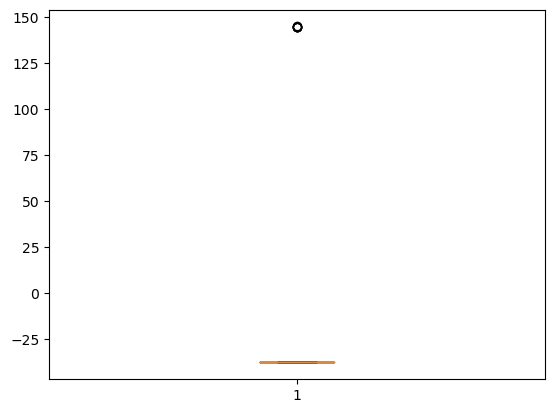

In [73]:
outliners_lat = plt.boxplot(dir_data['customer_lat'])['fliers'][0].get_data()[1]

**outliers long**

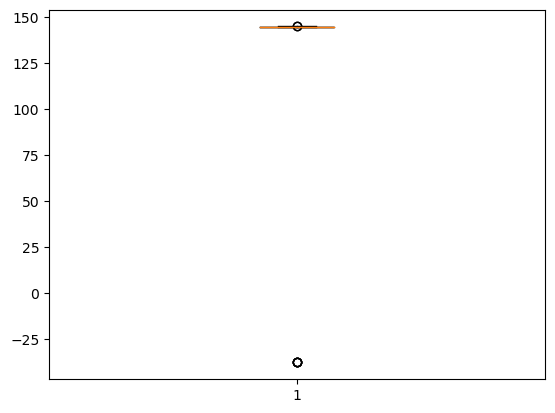

In [74]:
outliners_long = plt.boxplot(dir_data['customer_long'])['fliers'][0].get_data()[1]

Check where theey are exist in the data farme.

In [75]:
dir_data[dir_data['customer_lat'].isin(outliners_lat)]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,delivery_discount,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
65,ORD013739,ID0709970058,2022-05-21,Thompson,"[(Thunder line, 1), (Toshika 750, 1)]",6500.0,33.580,144.935278,-37.814246,50,Autumn,False,1.05158,five stars ease of use,True
96,ORD004503,ID3924911400,2022-06-02,Nickolson,"[(iAssist Line, 1), (pearTV, 1), (Thunder line...",14125.0,38.413,144.965171,-37.812620,50,Winter,True,0.76859,good replacement phone its a very good phone f...,True
270,ORD033808,ID0711331434,2022-06-15,Thompson,"[(Universe Note, 1), (iStream, 2)]",3750.0,32.840,144.957462,-37.807266,50,Winter,False,1.09440,awesome automatic updates to the newest androi...,True
375,ORD040485,ID1463620385,2022-11-30,Bakers,"[(Universe Note, 2), (Alcon 10, 1), (Thunder l...",26670.0,76.609,144.995437,-37.818170,25,Spring,True,0.91006,great phone works great,True
499,ORD450396,ID0746921887,2022-07-19,Nickolson,"[(iStream, 1), (Lucent 330S, 1), (Olivia x460,...",8915.0,68.154,144.981994,-37.825982,0,Winter,False,1.36872,great purchase on a like new universe note 5 i...,True


In [76]:
dir_data[dir_data['customer_long'] < 100]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,delivery_discount,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
65,ORD013739,ID0709970058,2022-05-21,Thompson,"[(Thunder line, 1), (Toshika 750, 1)]",6500.0,33.580,144.935278,-37.814246,50,Autumn,False,1.05158,five stars ease of use,True
96,ORD004503,ID3924911400,2022-06-02,Nickolson,"[(iAssist Line, 1), (pearTV, 1), (Thunder line...",14125.0,38.413,144.965171,-37.812620,50,Winter,True,0.76859,good replacement phone its a very good phone f...,True
270,ORD033808,ID0711331434,2022-06-15,Thompson,"[(Universe Note, 1), (iStream, 2)]",3750.0,32.840,144.957462,-37.807266,50,Winter,False,1.09440,awesome automatic updates to the newest androi...,True
375,ORD040485,ID1463620385,2022-11-30,Bakers,"[(Universe Note, 2), (Alcon 10, 1), (Thunder l...",26670.0,76.609,144.995437,-37.818170,25,Spring,True,0.91006,great phone works great,True
499,ORD450396,ID0746921887,2022-07-19,Nickolson,"[(iStream, 1), (Lucent 330S, 1), (Olivia x460,...",8915.0,68.154,144.981994,-37.825982,0,Winter,False,1.36872,great purchase on a like new universe note 5 i...,True


We can see that all the wrong customer_lat and customer_long are from the same row. So, next we have to find the correct customer_lat and customer_long for these rows.

### Fixing irregularities

As we can see that both abnoraml customer_lat and customer_long are in the same rows. So we need to calcualte the real latitude and longtitude of these customers by using **distance_to_nearest_warehouse** and **nearest_warehouse** columns.

create function that use calculate correct customer_lat and customer_long.

In [77]:
def get_lat_long(warehouse, distance, index):
    '''
    input: nearest warehouse
           distance to nearest warehouse
           index from each row
    '''
    
    # dictionary for each warehouse
    warehouse_lo_dict = {'Nickolson': [-37.818595, 144.969551],
                    'Thompson': [-37.8126732, 144.9470689],
                    'Bakers':[-37.8099961, 144.995232]}
    
    lat = warehouse_lo_dict[warehouse][0]
    long = warehouse_lo_dict[warehouse][1]
    
    # Convert latitude and longitude to radians
    lat1 = radians(lat)
    long1 = radians(long)

    # Earth's radius in km
    R = 6378

    # Calculate the latitude and longitude of the destination point
    lat2 = asin(sin(lat1)*cos(distance/R) + cos(lat1)*sin(distance/R)*cos(0))
    long2 = long1 + atan2(sin(0)*sin(distance/R)*cos(lat1), cos(distance/R)-sin(lat1)*sin(lat2))

    # Convert back to degrees
    lat2 = degrees(lat2)
    long2 = degrees(long2)
    
    fixed_index_list.append(index)
    return round(lat2, 6), round(long2, 6)

In [78]:
# create subset of wrong lat and long
wrong_lat_long = dir_data.loc[dir_data['customer_long'] < 100][['nearest_warehouse', 'distance_to_nearest_warehouse']]

# create fixed lat and long data frame
fixed_lat_long = wrong_lat_long.apply(lambda x: get_lat_long(x['nearest_warehouse'], x['distance_to_nearest_warehouse'], x.name), axis=1, result_type='expand')

update the correct customer_lat and customer_long

In [79]:
# update to the main data frame
dir_data.loc[dir_data['customer_long'] < 100, ['customer_lat']] = fixed_lat_long[0]
dir_data.loc[dir_data['customer_long'] < 100, ['customer_long']] = fixed_lat_long[1]

## Check season

## Find irregularities and fixing

Frirst **check a spelling** in season column.

In [80]:
dir_data['season'].unique()

array(['Winter', 'Summer', 'Autumn', 'Spring', 'winter', 'autumn',
       'summer'], dtype=object)

We can see that some seasons are spelled incorrectly.

Fix the incorect spelling.

In [81]:
# use function capitalize() from above
dir_data['season'] = dir_data.apply(lambda x: x['season'].capitalize(), axis=1)

Second, **Check correspondence between date and season** by follow these steps
1. create new data frame to prevent interfering with main data frame.
2. Create function to check the correspndece between month and season.
2. create new column that is used for keeping the boolean values, True means month is correspond with season and False is otherwise.

In [82]:
# Check if date and season are correspondence
dir_df2 = dir_data.copy()

In [83]:
# function compare between month and season
def compare_month_season(date, season, index):
    date_pat = re.compile(r'(\d{4})-(\d{2})-(\d{2})')
    month = date_pat.search(date).group(2)
    
    season_dict = {'Spring': ['09', '10', '11'],
                  'Summer': ['12', '01', '02'],
                  'Autumn': ['03', '04', '05'],
                  'Winter': ['06', '07', '08']}
    
    season_month_list = season_dict[season]
    if month in season_month_list:
        return True
    else:
        # check if the rows have been change or not
        if index not in fixed_index_list:
            fixed_index_list.append(index)
            return False
        else:
            return index

In [84]:
# Create new column that use for compare
dir_df2['com_date_season'] = dir_df2.apply(lambda x: compare_month_season(x['date'], x['season'], x.name), axis=1)

In [85]:
# Check if there are any row that do not correspoding, if False mean that 
dir_df2[dir_df2['com_date_season'] != True][['date', 'season']]

,date,season
28,2022-12-23,Winter
30,2022-05-05,Winter
158,2022-08-31,Autumn
159,2022-05-01,Winter
174,2022-11-02,Autumn
253,2022-06-01,Summer
304,2022-01-19,Spring
311,2022-07-01,Summer
431,2022-07-12,Summer
450,2022-09-03,Winter


**Fixing the errors in month**                                             

In [86]:
# function use to fix the wrong cell in season
def fix_season(boolean, date, season):
    # retrive month using regex
    date_pat = re.compile(r'(\d{4})-(\d{2})-(\d{2})')
    month = date_pat.search(date).group(2)
    
    season_dict = {'Spring': ['09', '10', '11'],
                  'Summer': ['12', '01', '02'],
                  'Autumn': ['03', '04', '05'],
                  'Winter': ['06', '07', '08']}
    
    # check if season is wrong then use month to retrive season
    if boolean == False:
        for key, value in season_dict.items():
            if month in value:
                season = key
                return key
    # if correct return season
    else:
        return season

In [87]:
# update correct values
dir_df2['season'] = dir_df2.apply(lambda x: fix_season(x['com_date_season'], x['date'], x['season']), axis=1)

In [88]:
# drop the com_date_season
dir_df2 = dir_df2.drop(columns='com_date_season')

In [89]:
# update main data frame dir_data
dir_data = dir_df2.copy()

## Check is_expedited_delivery

is_expedited_delivery can be explined by full_price. To classify it we need to use data that has no error, so I will use missing_data_solution data set to train the model (33366829_missing_data_solution.csv from the seccond task).

In [90]:
# Loading data
dir_df3 = pd.read_csv('33366829_missing_data_solution.csv')

In [91]:
# Chek if there is any typo
dir_df3['is_expedited_delivery'].unique()

array([ True, False])

Create a new column contains full delivery price.

In [92]:
dir_df3['full_delivery_price'] = round(dir_df3['delivery_charges'] / (1-(dir_df3['delivery_discount']/100)), 3)

### Training model

In this step, I will train models to predict is_expedited_delivery. Since each season has different business rules, so the models will be trained for different season. Additionally, I will train 2 different models for each season, **logistic regression**, **KNN** and select model besed on their predicting performance.

#### Create independent and dependent data frames for each season

In [93]:
# separate independent and dependent data sets for each season
# summer
X_summer = dir_df3.loc[dir_df3['season'] == 'Summer'][['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']]
y_summer = dir_df3.loc[dir_df3['season'] == 'Summer'][['is_expedited_delivery']]

# Spring
X_spring = dir_df3.loc[dir_df3['season'] == 'Spring'][['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']]
y_spring = dir_df3.loc[dir_df3['season'] == 'Spring'][['is_expedited_delivery']]

# Autumn
X_autumn = dir_df3.loc[dir_df3['season'] == 'Autumn'][['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']]
y_autumn = dir_df3.loc[dir_df3['season'] == 'Autumn'][['is_expedited_delivery']]

# Winter
X_winter = dir_df3.loc[dir_df3['season'] == 'Winter'][['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']]
y_winter = dir_df3.loc[dir_df3['season'] == 'Winter'][['is_expedited_delivery']]

#### Split train and test data sets based on season

In [94]:
# Summer
X_train_summer, X_test_summer, y_train_summer, y_test_summer = train_test_split(X_summer, y_summer, test_size=0.2, random_state=1)

# Spring
X_train_spring, X_test_spring, y_train_spring, y_test_spring = train_test_split(X_spring, y_spring, test_size=0.2, random_state=1)

# Autumn
X_train_autumn, X_test_autumn, y_train_autumn, y_test_autumn = train_test_split(X_autumn, y_autumn, test_size=0.2, random_state=1)

# Winter
X_train_winter, X_test_winter, y_train_winter, y_test_winter = train_test_split(X_winter, y_winter, test_size=0.2, random_state=1)


#### Initiate models

In [95]:
# Summer
knn_model_summer = KNeighborsClassifier(n_neighbors=5)
logis_model_summer = LogisticRegression()

# Spring
knn_model_spring = KNeighborsClassifier(n_neighbors=5)
logis_model_spring = LogisticRegression()

# Autumn
knn_model_autumn = KNeighborsClassifier(n_neighbors=5)
logis_model_autumn = LogisticRegression()

# Winter
knn_model_winter = KNeighborsClassifier(n_neighbors=5)
logis_model_winter = LogisticRegression()


#### Train models

In [96]:
# Summer
knn_model_summer.fit(X_train_summer, y_train_summer)
logis_model_summer.fit(X_train_summer, y_train_summer)

# Spring
knn_model_spring.fit(X_train_spring, y_train_spring)
logis_model_spring.fit(X_train_spring, y_train_spring)

# Autumn
knn_model_autumn.fit(X_train_autumn, y_train_autumn)
logis_model_autumn.fit(X_train_autumn, y_train_autumn)

# Winter
knn_model_winter.fit(X_train_winter, y_train_winter)
logis_model_winter.fit(X_train_winter, y_train_winter)


C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\non_n\conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\non_n\conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LogisticRegression()

#### Predicting

In [97]:
# Summer
y_pred_knn_summer = knn_model_summer.predict(X_test_summer)
y_pred_logist_summer = logis_model_summer.predict(X_test_summer)


# Spring
y_pred_knn_spring = knn_model_spring.predict(X_test_spring)
y_pred_logist_spring = logis_model_spring.predict(X_test_spring)

# Autumn
y_pred_knn_autumn = knn_model_autumn.predict(X_test_autumn)
y_pred_logist_autumn = logis_model_autumn.predict(X_test_autumn)

# Winter
y_pred_knn_winter = knn_model_winter.predict(X_test_winter)
y_pred_logist_winter = logis_model_winter.predict(X_test_winter)

C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

#### Evaluate the performance

In [98]:
# Summer
acc_knn_summer = round(accuracy_score(y_test_summer, y_pred_knn_summer), 3)
acc_logist_summer = round(accuracy_score(y_test_summer, y_pred_logist_summer), 3)

# Spring
acc_knn_spring = round(accuracy_score(y_test_spring, y_pred_knn_spring), 3)
acc_logist_spring = round(accuracy_score(y_test_spring, y_pred_logist_spring), 3)

# Autumn
acc_knn_autumn = round(accuracy_score(y_test_autumn, y_pred_knn_autumn), 3)
acc_logist_autumn = round(accuracy_score(y_test_autumn, y_pred_logist_autumn), 3)

# Winter
acc_knn_winter = round(accuracy_score(y_test_winter, y_pred_knn_winter), 3)
acc_logist_winter = round(accuracy_score(y_test_winter, y_pred_logist_winter), 3)

In [99]:
print(f'''Summer
KNN accuracy:           {acc_knn_summer}
Logistic accuracy:      {acc_logist_summer}
''')

Summer
KNN accuracy:           1.0
Logistic accuracy:      1.0



In [100]:
print(f'''Spring
KNN accuracy:           {acc_knn_spring}
Logistic accuracy:      {acc_logist_spring}
''')

Spring
KNN accuracy:           0.96
Logistic accuracy:      1.0



In [101]:
print(f'''Autumn
KNN accuracy:           {acc_knn_autumn}
Logistic accuracy:      {acc_logist_autumn}
''')

Autumn
KNN accuracy:           0.96
Logistic accuracy:      1.0



In [102]:
print(f'''Winter
KNN accuracy:           {acc_knn_winter}
Logistic accuracy:      {acc_logist_winter}
''')

Winter
KNN accuracy:           0.958
Logistic accuracy:      1.0



**Model selection**                                 
As we can see from above that, each model has different accuracy for each season. And we can see that the best method for predicting is **logistic regression** with accuracy 1.
* Summer ==> Logistic regression
* Spring ==> Logistic regression
* Autumn ==> Logistic regression
* Winter ==> Logistic regression

#### Check the current is_expedited in the main dir_data

Now, we are going to create new column named pred_is_expedited. It will be use to compare with is_expedited, if there is any different in values, the values will be replaced by new values from pred_is_expedited.

In [103]:
# Create function that predict is_expedited
def pred_is_exipedited(df):
    if df['season'] == 'Summer':
        pred = logis_model_summer.predict(df[['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Spring':
        pred = knn_model_spring.predict(df[['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Autumn':
        pred = logis_model_autumn.predict(df[['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Winter':
        pred = knn_model_winter.predict(df[['full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]

In [104]:
# Create full_delivery_price in dir_data
dir_data['full_delivery_price'] = round(dir_data['delivery_charges'] / (1-(dir_data['delivery_discount']/100)), 3)

In [105]:
# Create new column
dir_data['pred_is_expedited'] = dir_data[['season','full_delivery_price', 'distance_to_nearest_warehouse', 'is_happy_customer']].apply(pred_is_exipedited, axis=1)

C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid f

C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid f

C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning

Since the model accuracy is 100%. We will replce current is_expedited with new values.

In [106]:
# update unmatch values
dir_data.loc[(dir_data['is_expedited_delivery'] != dir_data['pred_is_expedited']), 'is_expedited_delivery'] = dir_data.loc[(dir_data['is_expedited_delivery'] != dir_data['pred_is_expedited']), 'pred_is_expedited']

In [107]:
# Change from object to bool
dir_data['is_expedited_delivery'] = dir_data['is_expedited_delivery'].astype('bool')

In [108]:
# drop unwanted columns
dir_data = dir_data.drop(['full_delivery_price', 'pred_is_expedited'], axis=1)

## Check distance_to_nearest_warehouse

We alredy fixed all the lat and long of customers. Now, we will check all distances based on **warehouse** and **customer lat and long**. by follow 
1. Create a column named dist_dict that contain dictionary of nearest warehouse and distance between nearest warehouse and customer location.
2. Check if there is any error in nearest_warehouse and distance_to_nearest_warehouse.
3. Correct the wrong cells.

Create function that receives customer_lat, customer_long as input and return a dictionary. The dictionary consist of key as warehouse and value as the distance between warehouse and customer location.

In [109]:
def get_dist(cust_lat, cust_lon):
    warehouse_lo_dict = {'Nickolson': [-37.818595, 144.969551],
                         'Thompson': [-37.8126732, 144.9470689],
                         'Bakers':[-37.8099961, 144.995232]}

    dist_dict = {'Nickolson': [],
                 'Thompson': [],
                 'Bakers':[]}
    for key in warehouse_lo_dict:
        lat1 = warehouse_lo_dict[key][0]
        lon1 = warehouse_lo_dict[key][1]
        lat2 = cust_lat
        lon2 = cust_lon

        # convert decimal degrees to radians
        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)
        # haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * asin(sqrt(a))
        # Radius of earth in kilometers is 6378
        km = round(6378 * c, 5)
            
        dist_dict[key].append(km)
    return dist_dict

Call the function and put returned dictionary to new column named dist_dict

In [110]:
dir_data['dist_dict'] = dir_data.apply(lambda x: get_dist(x['customer_lat'], x['customer_long']), axis=1)

Create function named get_warehouse to retrive nearest warehouse from the dictionary.

In [111]:
# find nearest warehouse
def get_warehouse(dictionary):
    value_list = list(dictionary.values())
    value_min = min(value_list)
    
    for key in dictionary:
        if dictionary[key] == value_min:
            return key    

Call get_warehouse function and store the values to new column named nearest_warehouse_cal.

In [112]:
dir_data['nearest_warehouse_cal'] = dir_data.apply(lambda x: get_warehouse(x['dist_dict']), axis=1)

In [113]:
dir_data[(dir_data['nearest_warehouse'] != dir_data['nearest_warehouse_cal'])][['nearest_warehouse', 'nearest_warehouse_cal']]

,nearest_warehouse,nearest_warehouse_cal
21,Bakers,Nickolson
66,Thompson,Bakers
124,Bakers,Nickolson
209,Thompson,Bakers
310,Bakers,Thompson
363,Bakers,Nickolson
418,Bakers,Thompson


#### Fixing nearest_warehouse

We can see that there are total 7 rows unmatch between distance and nearest warehouse. Next, we are going to create a function that will return the correct nearest warehouse.

In [114]:
# built comepare function
def get_correct_warehouse(actual, cal, index):
    # if true mean that it has been change before, so no need to change.
    
    if actual != cal:
        if index not in fixed_index_list:
            actual = cal
            fixed_index_list.append(index)
            return actual
        else: 
            print(index)

In [115]:
# update to correct warehouse
dir_data.loc[dir_data['nearest_warehouse'] != dir_data['nearest_warehouse_cal'], ['nearest_warehouse']] = dir_data.apply(lambda x: get_correct_warehouse(x['nearest_warehouse'], x['nearest_warehouse_cal'], x.name), axis=1)

In [116]:
# check if all imputed
dir_data.loc[dir_data['nearest_warehouse'] != dir_data['nearest_warehouse_cal'], ['nearest_warehouse','distance_to_nearest_warehouse', 'dist_dict','nearest_warehouse_cal']]

,nearest_warehouse,distance_to_nearest_warehouse,dist_dict,nearest_warehouse_cal


**Compare distance_to_nearest_warehose and calculated distance to nearest warehouse**

create new column cal_dist to get store nearest distance.

In [117]:
# find nearest warehouse distance
def get_nearest_dist(dictionary):
    value_list = list(dictionary.values())
    value_min = min(value_list)
    
    return value_min[0]

In [118]:
# Create new column 
dir_data['cal_dist'] = dir_data.apply(lambda x: get_nearest_dist(x['dist_dict']), axis=1)

In [119]:
dir_data[(dir_data['distance_to_nearest_warehouse'] != dir_data['cal_dist']) & abs((dir_data['distance_to_nearest_warehouse'] - dir_data['cal_dist'] > 0.001))][['nearest_warehouse', 'nearest_warehouse_cal','distance_to_nearest_warehouse', 'cal_dist']]

,nearest_warehouse,nearest_warehouse_cal,distance_to_nearest_warehouse,cal_dist
241,Nickolson,Nickolson,1.14422,0.60761
275,Bakers,Bakers,0.51540,0.48226


**Fix the wrong distance_to_nearest_warehouse**

In [120]:
# Create sub data set
correct_dist = dir_data[(dir_data['distance_to_nearest_warehouse'] != dir_data['cal_dist']) & abs((dir_data['distance_to_nearest_warehouse'] - dir_data['cal_dist'] > 0.001))]['cal_dist'] 

# update wrong cells
dir_data.loc[(dir_data['distance_to_nearest_warehouse'] != dir_data['cal_dist']) & abs((dir_data['distance_to_nearest_warehouse'] - dir_data['cal_dist'] > 0.001)), 'distance_to_nearest_warehouse'] = correct_dist

## Check is_happy_customer

Check if there is any typo.

In [121]:
dir_data['is_happy_customer'].unique()

array([ True, False])

In [122]:
# transfrom object to str
dir_data['latest_customer_review'] = dir_data['latest_customer_review'].astype(str)

#### Sentiment analysis

In this process, we will create new column named check_is_happy that will be stored with the result from sentiment_analyze function.

In [123]:
# sentiment analysis function
def sentiment_analyze(review):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(review)['compound']
    
    if score >= 0.05:
        return True
    else:
        return False

In [124]:
# Create new column
dir_data['check_is_happy'] = dir_data['latest_customer_review'].apply(sentiment_analyze)

To see if there is any different between both column is_customer_happy and check_is_happy

In [125]:
dir_data.loc[dir_data['is_happy_customer'] != dir_data['check_is_happy']][['latest_customer_review', 'is_happy_customer', 'check_is_happy']]

,latest_customer_review,is_happy_customer,check_is_happy
4,nan,True,False
164,works great and easy to set up!,False,True
306,good a perfect deal,False,True
318,best phone i ever had!!! best phone i have eve...,False,True
342,psa to us americans everything is amazing but ...,False,True
396,one of the worst phones i've ever used one of ...,True,False
420,it work good good phone,False,True


As we can see that there are 7 unmatches. After examine the latest_customer_review, we can see that is_happy__customer cells are wrong. So we need to replace it with value from check_is_happy.

In [126]:
# Create function that use to correct the wrong cells
def get_correct_happy(review, actual, cal, index):
    if review == 'nan':
        fixed_index_list.append(index)
        return True
    elif len(review) == 1:
        fixed_index_list.append(index)
        return True
    elif actual != cal:
        if index not in fixed_index_list:
            fixed_index_list.append(index)
            return cal
        else:
            print(index)
    else:
        return actual

In [127]:
# update wrong cells
dir_data['is_happy_customer'] = dir_data.apply(lambda x: get_correct_happy(x['latest_customer_review'], x['is_happy_customer'], x['check_is_happy'], x.name), axis=1)

## Write the solution file

In [128]:
dir_data = dir_data.drop(columns=['dist_dict', 'nearest_warehouse_cal', 'cal_dist', 'check_is_happy'])

In [129]:
dir_data.to_csv('33366829_dirty_data_solution.csv', index=False)

-------------------------------------

<div class="alert alert-block alert-success">
    
## 5.  Outliers detecting and removing <a class="anchor" name="write"></a>

We know from the specification that outliers are exist only in the delivery_chargres, we also know that delivery_charges is calculated based on different season and has a linear relationship with variables below.
1. delivery_discount
2. is_expedited_delivery
3. distance_to_nearest_warehouse
4. is_happy_customer

To detect outliers, we need to use multivariate outlier detection methods. This task will be perform and evaluate by using **Linear residual method**.

## Load data 

In [130]:
main_df = pd.read_csv('33366829_outlier_data.csv')

Create new column that stores full_delivery_price.

In [131]:
main_df['full_delivery_price'] = round(main_df['delivery_charges'] / (1-(main_df['delivery_discount']/100)), 3)

### Ploting data 

Ploting data to see how data distributed using scatter plot. From the plot below, we can see that there are some data points clearly diviated from the main group.

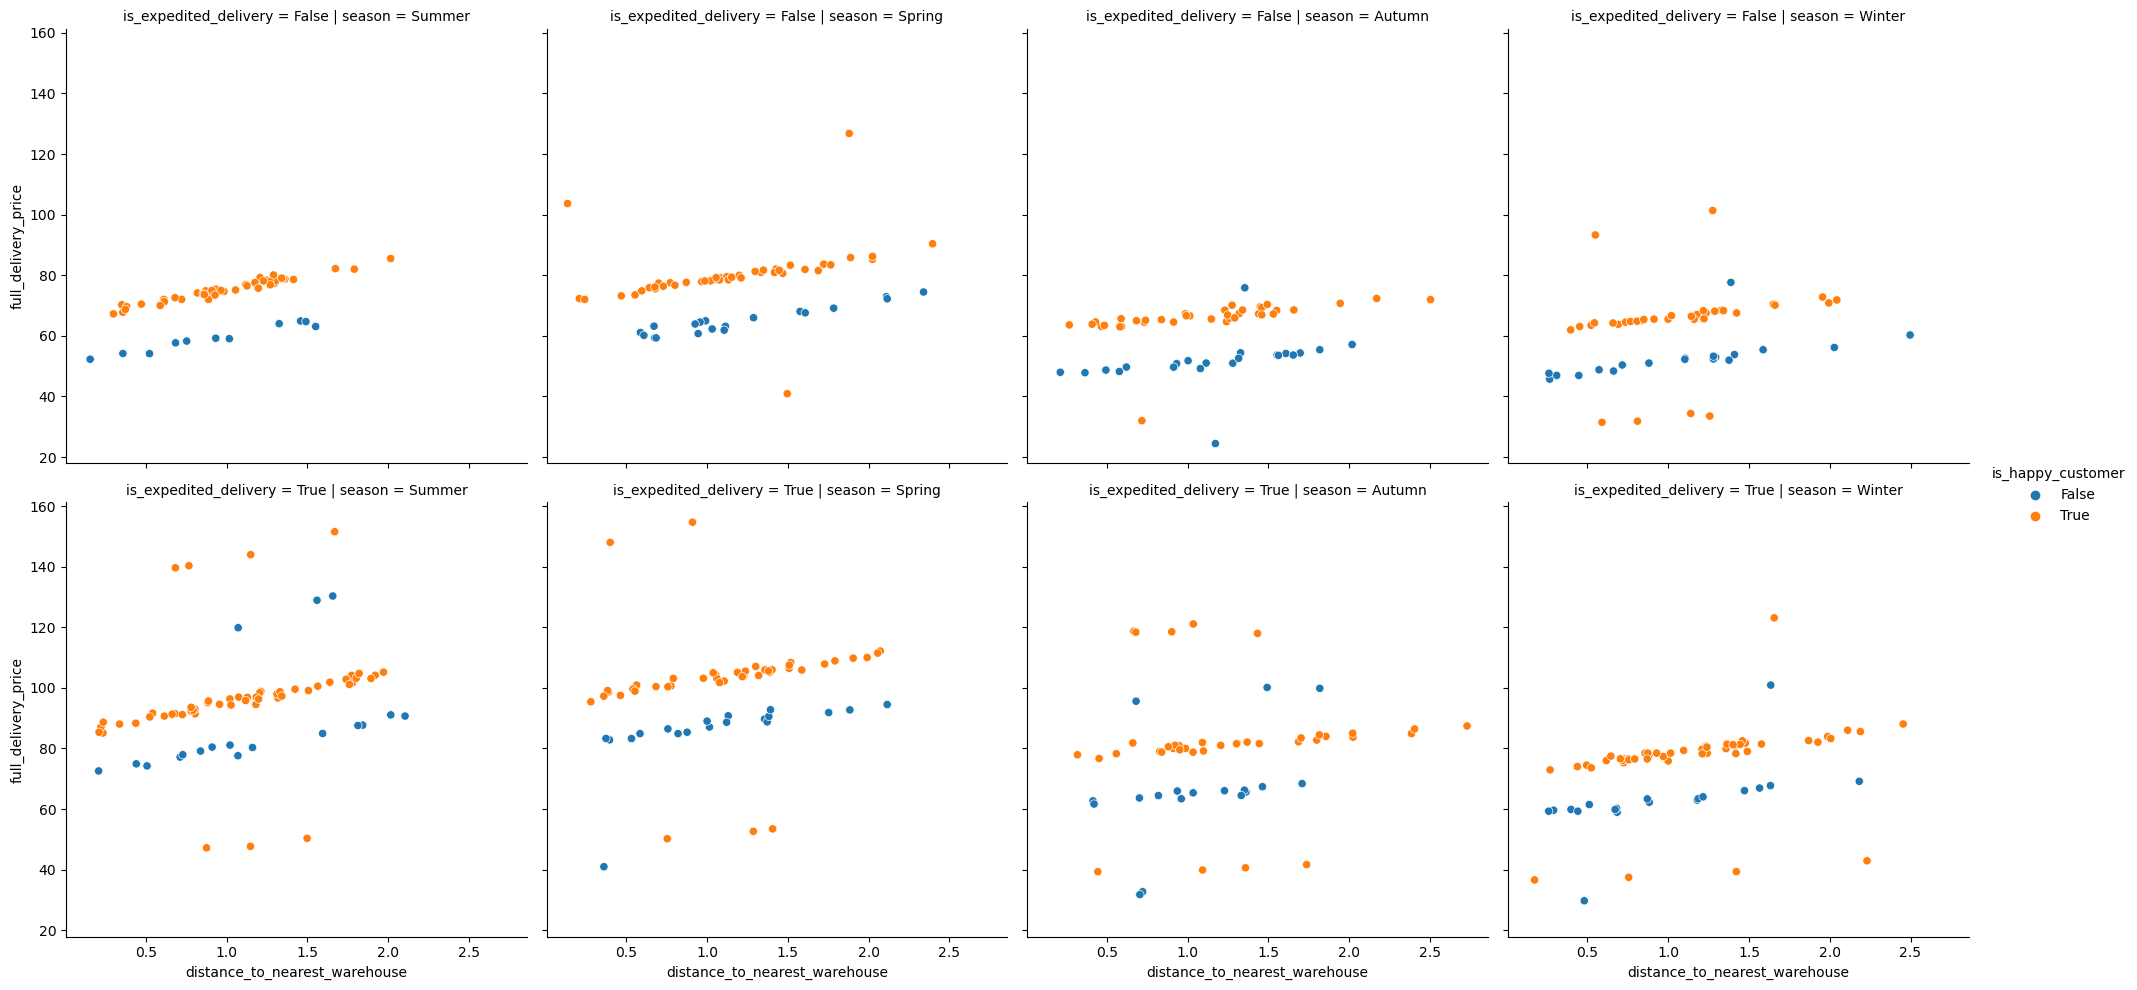

In [132]:
main_plot_1 = sns.relplot(data=main_df, x='distance_to_nearest_warehouse', y='full_delivery_price', hue='is_happy_customer', col='season', row='is_expedited_delivery', kind='scatter')

## Linear residual method

In this process,the steps are
1. we will train model by using data from missing data set. 
2. Then fit to our main data frame.
3. Calculate residual
4. Calculate mean squre error.
5. Use IQR to decide outliers.
6. Remove outlier.
7. Calculate mean squre error after remove outlier.
8. Compare MSE before and after remove outliers.

**Train linear model**

In [133]:
lm_out = miss_df.copy()

In [134]:
# keep only related features
lm_out = lm_out[['delivery_discount', 'season' , 'is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer', 'delivery_charges']]

In [135]:
# separate byseason
summer_df = lm_out.loc[lm_out['season'] == 'Summer'].drop('season', axis= 1)
spring_df = lm_out.loc[lm_out['season'] == 'Spring'].drop('season', axis= 1)
autumn_df = lm_out.loc[lm_out['season'] == 'Autumn'].drop('season', axis= 1)
winter_df = lm_out.loc[lm_out['season'] == 'Winter'].drop('season', axis= 1)

**Train summer model**

In [136]:
summer_df['full_delivery_price'] = round(summer_df['delivery_charges'] / (1-(summer_df['delivery_discount']/100)), 3)
summer_df = summer_df.drop(columns=['delivery_discount', 'delivery_charges'])

Split data into independent and dependent data sets.

In [137]:
# Independent variable
summer_X = summer_df.drop('full_delivery_price', axis= 1)

# Dependent variable
summer_y = summer_df['full_delivery_price']

Training model

In [138]:
# create model
lm_summer = LinearRegression()
# fitting model
lm_summer.fit(summer_X, summer_y)

LinearRegression()

For the remaining season, the steps of spliting data, training, and evaluating will be same as above.

**Train spring model**

In [139]:
spring_df = spring_df.dropna()
spring_df['full_delivery_price'] = round(spring_df['delivery_charges'] / (1-(spring_df['delivery_discount']/100)), 3)
spring_df = spring_df.drop(columns=['delivery_discount', 'delivery_charges'])

In [140]:
# Independent variable
spring_X = spring_df.drop('full_delivery_price', axis= 1)

# Dependent variable
spring_y = spring_df['full_delivery_price']

In [141]:
# create model
lm_spring = LinearRegression()
# fitting model
lm_spring.fit(spring_X, spring_y)

LinearRegression()

**Train autumn model**

In [142]:
autumn_df = autumn_df.dropna()
autumn_df['full_delivery_price'] = round(autumn_df['delivery_charges'] / (1-(autumn_df['delivery_discount']/100)), 3)
autumn_df = autumn_df.drop(columns=['delivery_discount', 'delivery_charges'])

In [143]:
# Independent variable
autumn_X = autumn_df.drop('full_delivery_price', axis= 1)

# Dependent variable
autumn_y = autumn_df['full_delivery_price']

In [144]:
# create model
lm_autumn = LinearRegression()

#fitting model
lm_autumn.fit(X_train, y_train)

LinearRegression()

**Train winter model**

In [145]:
winter_df = winter_df.dropna()
winter_df['full_delivery_price'] = round(winter_df['delivery_charges'] / (1-(winter_df['delivery_discount']/100)), 3)
winter_df = winter_df.drop(columns=['delivery_discount', 'delivery_charges'])

In [146]:
# Independent variable
winter_X = winter_df.drop('full_delivery_price', axis= 1)

# Dependent variable
winter_y = winter_df['full_delivery_price']

In [147]:
# create model
lm_winter = LinearRegression()

# fitting model
lm_winter.fit(winter_X, winter_y)

LinearRegression()

## Predicting

Now, we will predict main_df using the linear model and find residual.

In [148]:
def impute_deli_charge(df):
    if df['season'] == 'Summer':
        pred = lm_summer.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Spring':
        pred = lm_spring.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Autumn':
        pred = lm_autumn.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]
    elif df['season'] == 'Winter':
        pred = lm_winter.predict(df[['is_expedited_delivery', 'distance_to_nearest_warehouse', 'is_happy_customer']].values.reshape(1, -1))
        return pred[0]


Create new data frmae amd create predicted full deivery price column

In [149]:
main_df_0 = main_df.copy()

In [150]:
main_df_0['pred_full_price_0'] = main_df.apply(impute_deli_charge, axis=1)

C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, 

C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, 

Create residual square column

In [151]:
main_df_0['residual_square'] = (main_df_0['full_delivery_price'] - main_df_0['pred_full_price_0']) ** 2

Plot boxplot to see the residual outliers

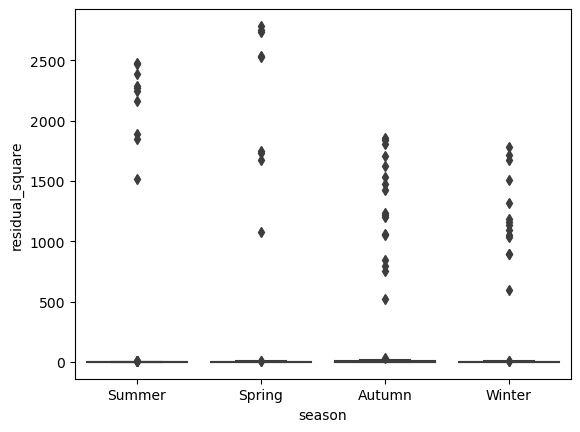

In [152]:
out_plt1 = sns.boxplot(x= 'season', y='residual_square', data= main_df_0)

**Calculate mean square error before removing outlier**

In [153]:
# before remove outlier
summer_0 = main_df_0.loc[main_df_0['season'] == 'Summer'][['pred_full_price_0', 'full_delivery_price']]
spring_0 = main_df_0.loc[main_df_0['season'] == 'Spring'][['pred_full_price_0', 'full_delivery_price']]
autumn_0 = main_df_0.loc[main_df_0['season'] == 'Autumn'][['pred_full_price_0', 'full_delivery_price']]
winter_0 = main_df_0.loc[main_df_0['season'] == 'Winter'][['pred_full_price_0', 'full_delivery_price']]

In [154]:
mean_sq_err_0 = {'summer': mean_squared_error(summer_0['pred_full_price_0'], summer_0['full_delivery_price']),
                'spring': mean_squared_error(spring_0['pred_full_price_0'], spring_0['full_delivery_price']),
                'autumn': mean_squared_error(autumn_0['pred_full_price_0'], autumn_0['full_delivery_price']),
                'winter': mean_squared_error(winter_0['pred_full_price_0'], winter_0['full_delivery_price'])}

**Retrive outliers from boxplot**

In [155]:
# get outlier values
summer_out_0 = plt.boxplot(main_df_0.loc[main_df_0['season']== 'Summer', ['residual_square']])['fliers'][0].get_data()[1]
spring_out_0 = plt.boxplot(main_df_0.loc[main_df_0['season']== 'Spring', ['residual_square']])['fliers'][0].get_data()[1]
autumn_out_0 = plt.boxplot(main_df_0.loc[main_df_0['season']== 'Autumn', ['residual_square']])['fliers'][0].get_data()[1]
winter_out_0 = plt.boxplot(main_df_0.loc[main_df_0['season']== 'Winter', ['residual_square']])['fliers'][0].get_data()[1]
plt.close()

**Remove outliers from main_df_0**

In [156]:
# Remove rows containing LOF outliers for summer
main_df_0 = main_df_0[~((main_df_0['season'] == 'Summer') & (main_df_0['residual_square'].isin(summer_out_0)))]

# Remove rows containing LOF outliers for spring
main_df_0 = main_df_0[~((main_df_0['season'] == 'Spring') & (main_df_0['residual_square'].isin(spring_out_0)))]

# Remove rows containing LOF outliers for autumn
main_df_0 = main_df_0[~((main_df_0['season'] == 'Autumn') & (main_df_0['residual_square'].isin(autumn_out_0)))]

# Remove rows containing LOF outliers for winter
main_df_0 = main_df_0[~((main_df_0['season'] == 'Winter') & (main_df_0['residual_square'].isin(winter_out_0)))]

In [157]:
# remove outlier
summer_1 = main_df_0.loc[main_df_0['season'] == 'Summer'][['pred_full_price_0', 'full_delivery_price']]
spring_1 = main_df_0.loc[main_df_0['season'] == 'Spring'][['pred_full_price_0', 'full_delivery_price']]
autumn_1 = main_df_0.loc[main_df_0['season'] == 'Autumn'][['pred_full_price_0', 'full_delivery_price']]
winter_1 = main_df_0.loc[main_df_0['season'] == 'Winter'][['pred_full_price_0', 'full_delivery_price']]

In [158]:
mean_sq_err_1 = {'summer': mean_squared_error(summer_1['pred_full_price_0'], summer_1['full_delivery_price']),
                'spring': mean_squared_error(spring_1['pred_full_price_0'], spring_1['full_delivery_price']),
                'autumn': mean_squared_error(autumn_1['pred_full_price_0'], autumn_1['full_delivery_price']),
                'winter': mean_squared_error(winter_1['pred_full_price_0'], winter_1['full_delivery_price'])}

## Evaluating data set

Now, we can compare MSE before and after removing outliers. As MSE below, we can see that after remove outliers, MSE for each season has decrease greatly (close to 0). Additionally, we also can see from the plot below that data points linearly distributed without any suspicious data points. Hence, we can conclude that outliers are all removed.

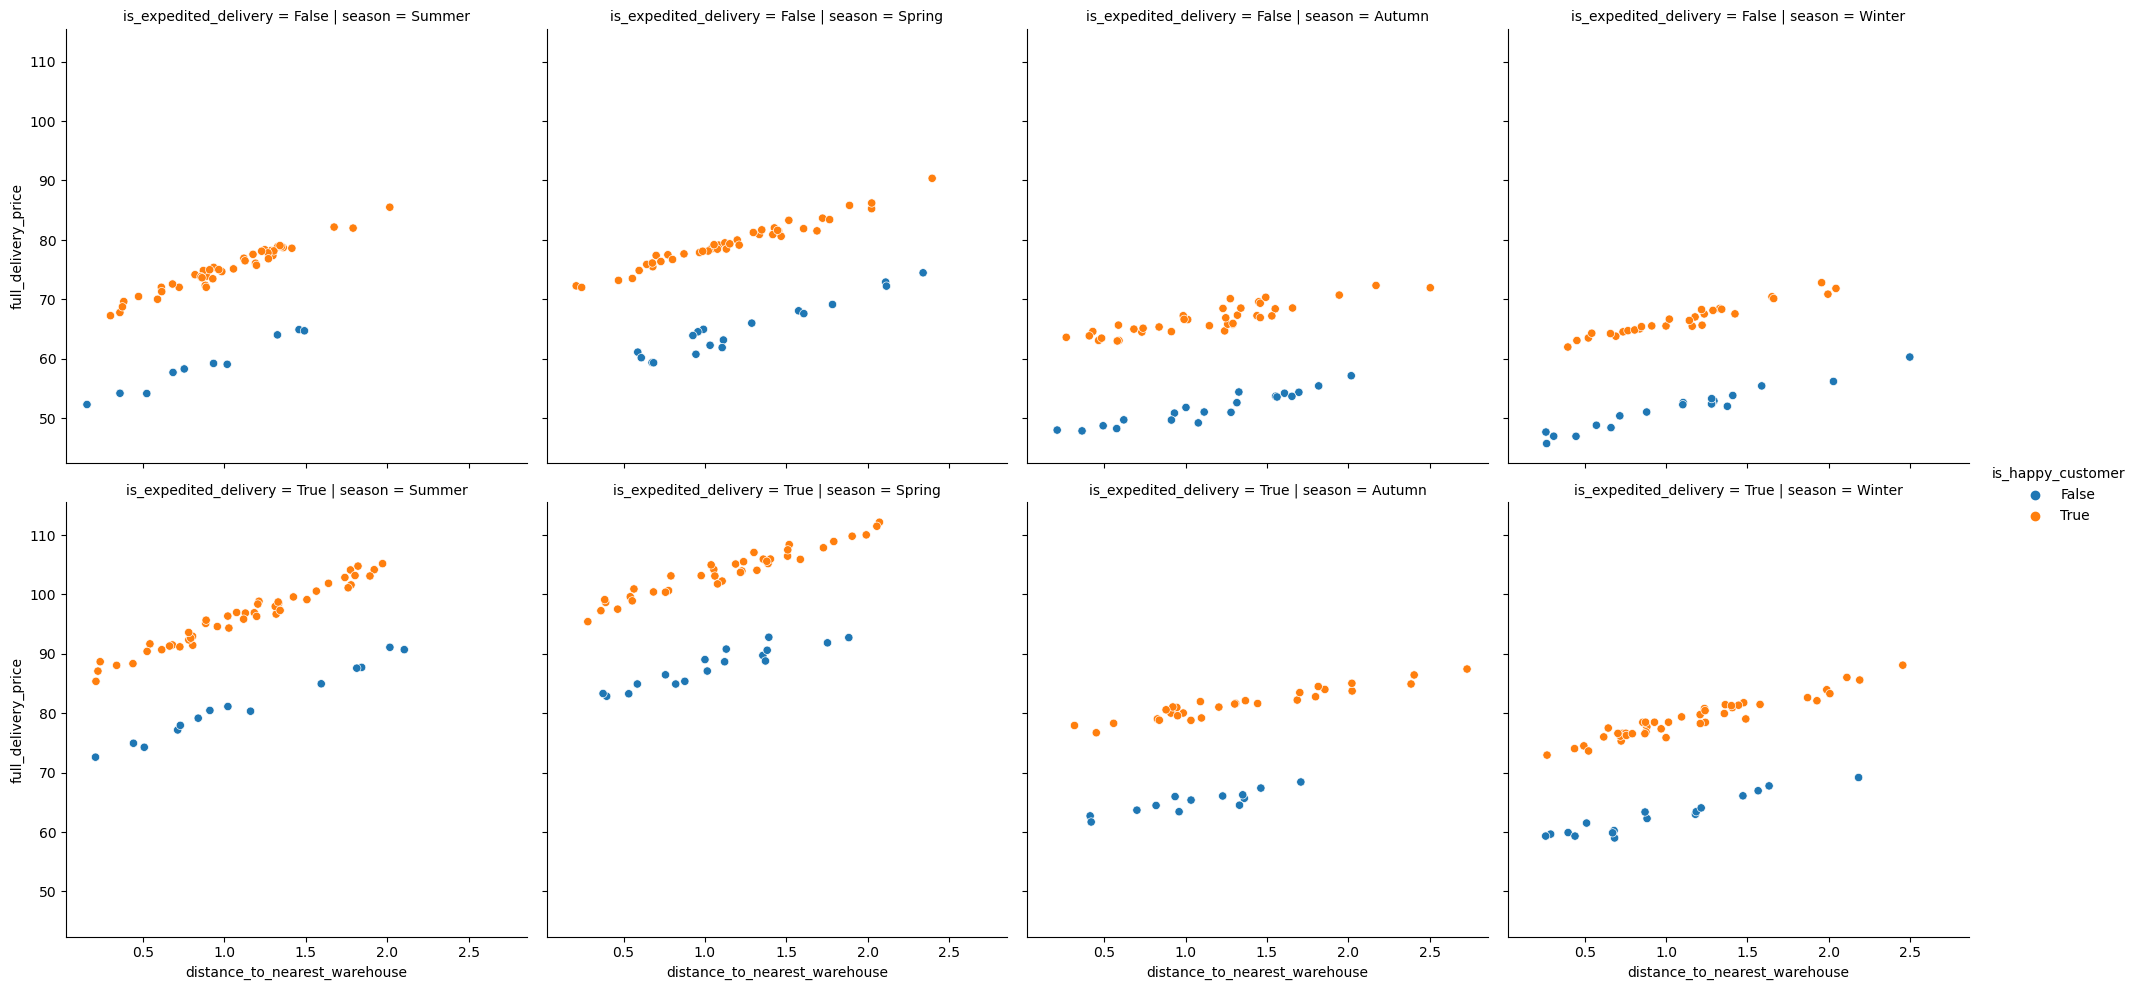

In [159]:
main_plot_2 = sns.relplot(data=main_df_0, x='distance_to_nearest_warehouse', y='full_delivery_price', hue='is_happy_customer', col='season', row='is_expedited_delivery', kind='scatter')

In [160]:
# MSE beofre removing outliers
mean_sq_err_0

{'summer': 166.61735511779324,
 'spring': 155.01242664351238,
 'autumn': 188.86677241659558,
 'winter': 136.87635362229454}

In [161]:
# MSE after removing outliers
mean_sq_err_1

{'summer': 0.7193802756353526,
 'spring': 1.0425085034561608,
 'autumn': 3.1283805507549953,
 'winter': 0.7282500746865915}

## Update main data frame and write file

In [162]:
main_df = main_df_0.copy()

In [163]:
main_df = main_df.drop(['full_delivery_price', 'pred_full_price_0', 'residual_square'], axis=1)

In [164]:
main_df.to_csv('33366829_outlier_data_solution.csv', index=False)

-------------------------------------

<div class="alert alert-block alert-success">
    
## 6. References <a class="anchor" name="Ref"></a>

1. **ast.literal.eval()** https://medium.com/pragmatic-programmers/parse-with-literal-eval-2dbf4ec2ecf7
2. **Find distance based on latitude and longtitude** https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
3. **KNN** https://realpython.com/knn-python/
4. **Logistic regression** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## --------------------------------------------------------------------------------------------------------------------------